Alle Features (inkl. Helper) und Bibliotheken importieren.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
pd.set_option("display.max_columns", None)

helper_df = pd.read_pickle("../data/processed/helper.pkl")
features_df = pd.read_pickle("../data/processed/features.pkl")

In [2]:
features_df

,start_time,end_time,month_sin,month_cos,day_of_week_sin,day_of_week_cos,minute_of_day_sin,minute_of_day_cos,wind_dir_sin,wind_dir_cos,wind_speed_kt,is_wind_variable,vis_ge_10km,vis_category,temperature_c,spread_c,qnh_hpa,is_holiday,scheduled_departures,scheduled_arrivals,avg_dep_delay_slot_minutes,avg_dep_delay_prev_slot_minutes,avg_dep_delay_past_6h_minutes,scheduled_B,scheduled_C,scheduled_D,scheduled_E,scheduled_F,scheduled_rwy_concept,arr_dep_ratio
0,2023-01-01 00:00:00+00:00,2023-01-01 00:30:00+00:00,0.000000,1.0,-0.781831,0.623490,0.000000,1.000000,0.173648,-0.984808,9.0,False,False,2–5km,10.0,4.0,1023.0,True,0,0,0.0,0.0,0.0,0,0,0,0,0,NaN,0.0
1,2023-01-01 00:30:00+00:00,2023-01-01 01:00:00+00:00,0.000000,1.0,-0.781831,0.623490,0.130526,0.991445,0.173648,-0.984808,3.0,False,False,2–5km,10.0,4.0,1023.0,True,0,0,0.0,0.0,0.0,0,0,0,0,0,NaN,0.0
2,2023-01-01 01:00:00+00:00,2023-01-01 01:30:00+00:00,0.000000,1.0,-0.781831,0.623490,0.258819,0.965926,-0.173648,-0.984808,8.0,False,True,8–10km,11.0,5.0,1023.0,True,0,0,0.0,0.0,0.0,0,0,0,0,0,NaN,0.0
3,2023-01-01 01:30:00+00:00,2023-01-01 02:00:00+00:00,0.000000,1.0,-0.781831,0.623490,0.382683,0.923880,-0.866025,-0.500000,6.0,False,True,8–10km,13.0,6.0,1023.0,True,0,0,0.0,0.0,0.0,0,0,0,0,0,NaN,0.0
4,2023-01-01 02:00:00+00:00,2023-01-01 02:30:00+00:00,0.000000,1.0,-0.781831,0.623490,0.500000,0.866025,-0.342020,-0.939693,7.0,False,True,8–10km,14.0,7.0,1023.0,True,0,0,0.0,0.0,0.0,0,0,0,0,0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47995,2025-09-26 21:30:00+00:00,2025-09-26 22:00:00+00:00,-0.866025,-0.5,-0.433884,-0.900969,-0.608761,0.793353,NaN,NaN,3.0,True,False,5–8km,10.0,1.0,1020.0,False,0,0,0.0,0.0,0.0,0,0,0,0,0,NaN,0.0
47996,2025-09-26 22:00:00+00:00,2025-09-26 22:30:00+00:00,-0.866025,-0.5,-0.433884,-0.900969,-0.500000,0.866025,NaN,NaN,2.0,True,False,5–8km,10.0,1.0,1020.0,False,0,0,0.0,0.0,0.0,0,0,0,0,0,NaN,0.0
47997,2025-09-26 22:30:00+00:00,2025-09-26 23:00:00+00:00,-0.866025,-0.5,-0.433884,-0.900969,-0.382683,0.923880,NaN,NaN,1.0,True,False,5–8km,10.0,1.0,1020.0,False,0,0,0.0,0.0,0.0,0,0,0,0,0,NaN,0.0
47998,2025-09-26 23:00:00+00:00,2025-09-26 23:30:00+00:00,-0.866025,-0.5,-0.433884,-0.900969,-0.258819,0.965926,-0.500000,-0.866025,4.0,False,True,8–10km,10.0,1.0,1020.0,False,0,0,0.0,0.0,0.0,0,0,0,0,0,NaN,0.0


In [3]:
helper_df

,start_time,end_time,month,day_of_week,minute_of_day,month_sin,month_cos,day_of_week_sin,day_of_week_cos,minute_of_day_sin,minute_of_day_cos,metar_time_utc,wind_dir_deg,wind_speed_kt,is_wind_variable,wind_dir_sin,wind_dir_cos,visibility_m_clean,vis_ge_10km,vis_category,temperature_c,dewpoint_c,spread_c,qnh_hpa,start_time_local,date_local,is_holiday,scheduled_departures,scheduled_arrivals,avg_dep_delay_slot_minutes,avg_dep_delay_prev_slot_minutes,avg_dep_delay_past_6h_minutes,scheduled_B,scheduled_C,scheduled_D,scheduled_E,scheduled_F,actual_rwy_concept,scheduled_rwy_concept,arr_dep_ratio
0,2023-01-01 00:00:00+00:00,2023-01-01 00:30:00+00:00,0,6,0,0.000000,1.0,-0.781831,0.623490,0.000000,1.000000,2022-12-31 23:50:00+00:00,170.0,9.0,False,0.173648,-0.984808,4800.0,False,2–5km,10.0,6.0,4.0,1023.0,2023-01-01 01:00:00+01:00,2023-01-01,True,0,0,0.0,0.0,0.0,0,0,0,0,0,NaN,NaN,0.0
1,2023-01-01 00:30:00+00:00,2023-01-01 01:00:00+00:00,0,6,30,0.000000,1.0,-0.781831,0.623490,0.130526,0.991445,2023-01-01 00:20:00+00:00,170.0,3.0,False,0.173648,-0.984808,5000.0,False,2–5km,10.0,6.0,4.0,1023.0,2023-01-01 01:30:00+01:00,2023-01-01,True,0,0,0.0,0.0,0.0,0,0,0,0,0,NaN,NaN,0.0
2,2023-01-01 01:00:00+00:00,2023-01-01 01:30:00+00:00,0,6,60,0.000000,1.0,-0.781831,0.623490,0.258819,0.965926,2023-01-01 00:50:00+00:00,190.0,8.0,False,-0.173648,-0.984808,10000.0,True,8–10km,11.0,6.0,5.0,1023.0,2023-01-01 02:00:00+01:00,2023-01-01,True,0,0,0.0,0.0,0.0,0,0,0,0,0,NaN,NaN,0.0
3,2023-01-01 01:30:00+00:00,2023-01-01 02:00:00+00:00,0,6,90,0.000000,1.0,-0.781831,0.623490,0.382683,0.923880,2023-01-01 01:20:00+00:00,240.0,6.0,False,-0.866025,-0.500000,10000.0,True,8–10km,13.0,7.0,6.0,1023.0,2023-01-01 02:30:00+01:00,2023-01-01,True,0,0,0.0,0.0,0.0,0,0,0,0,0,NaN,NaN,0.0
4,2023-01-01 02:00:00+00:00,2023-01-01 02:30:00+00:00,0,6,120,0.000000,1.0,-0.781831,0.623490,0.500000,0.866025,2023-01-01 01:50:00+00:00,200.0,7.0,False,-0.342020,-0.939693,10000.0,True,8–10km,14.0,7.0,7.0,1023.0,2023-01-01 03:00:00+01:00,2023-01-01,True,0,0,0.0,0.0,0.0,0,0,0,0,0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47995,2025-09-26 21:30:00+00:00,2025-09-26 22:00:00+00:00,8,4,1290,-0.866025,-0.5,-0.433884,-0.900969,-0.608761,0.793353,2025-09-26 21:20:00+00:00,NaN,3.0,True,NaN,NaN,7000.0,False,5–8km,10.0,9.0,1.0,1020.0,2025-09-26 23:30:00+02:00,2025-09-26,False,0,0,0.0,0.0,0.0,0,0,0,0,0,NaN,NaN,0.0
47996,2025-09-26 22:00:00+00:00,2025-09-26 22:30:00+00:00,8,4,1320,-0.866025,-0.5,-0.433884,-0.900969,-0.500000,0.866025,2025-09-26 21:50:00+00:00,NaN,2.0,True,NaN,NaN,6000.0,False,5–8km,10.0,9.0,1.0,1020.0,2025-09-27 00:00:00+02:00,2025-09-27,False,0,0,0.0,0.0,0.0,0,0,0,0,0,NaN,NaN,0.0
47997,2025-09-26 22:30:00+00:00,2025-09-26 23:00:00+00:00,8,4,1350,-0.866025,-0.5,-0.433884,-0.900969,-0.382683,0.923880,2025-09-26 22:20:00+00:00,NaN,1.0,True,NaN,NaN,7000.0,False,5–8km,10.0,9.0,1.0,1020.0,2025-09-27 00:30:00+02:00,2025-09-27,False,0,0,0.0,0.0,0.0,0,0,0,0,0,NaN,NaN,0.0
47998,2025-09-26 23:00:00+00:00,2025-09-26 23:30:00+00:00,8,4,1380,-0.866025,-0.5,-0.433884,-0.900969,-0.258819,0.965926,2025-09-26 22:50:00+00:00,210.0,4.0,False,-0.500000,-0.866025,10000.0,True,8–10km,10.0,9.0,1.0,1020.0,2025-09-27 01:00:00+02:00,2025-09-27,False,0,0,0.0,0.0,0.0,0,0,0,0,0,NaN,NaN,0.0


Erstellung einer Korrelationsmatrix für alle nicht-zyklischen Features gegen den durchschnittlichen DEP Delay.

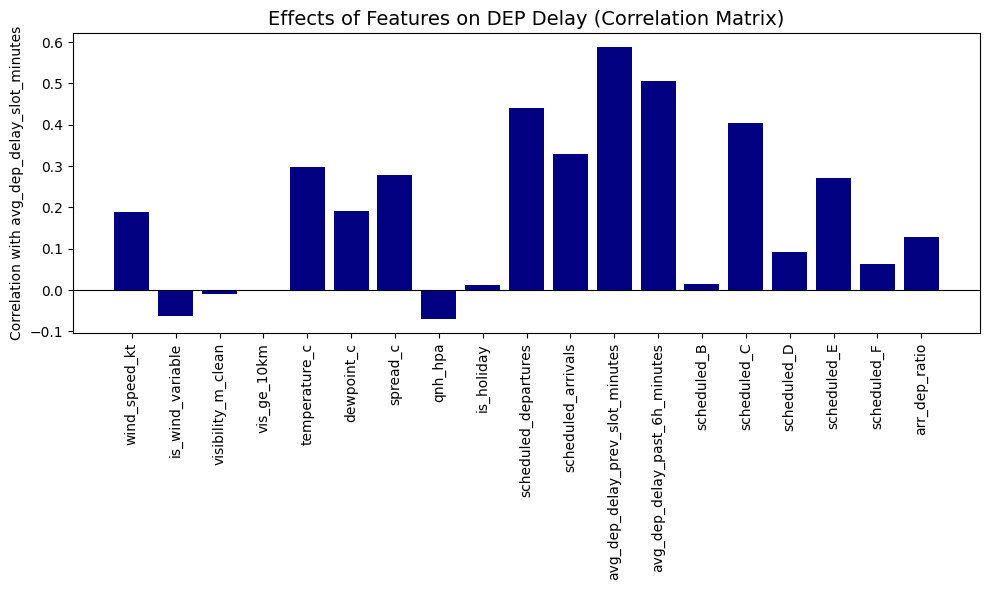

In [19]:
# List of columns to include in the correlation analysis
columns_to_compare = [
    "wind_speed_kt", "is_wind_variable",
    "visibility_m_clean", "vis_ge_10km",
    "temperature_c", "dewpoint_c", "spread_c",
    "qnh_hpa",
    "is_holiday",
    "scheduled_departures", "scheduled_arrivals",
    "avg_dep_delay_prev_slot_minutes", "avg_dep_delay_past_6h_minutes",
    "scheduled_B", "scheduled_C", "scheduled_D", "scheduled_E", "scheduled_F",
    "arr_dep_ratio"
]

# Target variable for correlation comparison
target = "avg_dep_delay_slot_minutes"

# Calculate correlations between each feature and the target variable
correlations = []
for col in columns_to_compare:
    if col in helper_df.columns:
        corr_value = helper_df[target].corr(helper_df[col])
        correlations.append(corr_value)
    else:
        correlations.append(None)

# Create a new DataFrame for easier plotting
corr_df = pd.DataFrame({
    "Feature": columns_to_compare,
    "Correlation": correlations
})

# Sort features by correlation strength (optional)
#corr_df = corr_df.sort_values(by="Correlation", ascending=False)

# Create bar chart visualising the correlations
plt.figure(figsize=(10, 6))
plt.bar(corr_df["Feature"], corr_df["Correlation"], color="navy")
plt.xticks(rotation=90)
plt.axhline(0, color='black', linewidth=0.8)
plt.ylabel("Correlation with avg_dep_delay_slot_minutes")
plt.title("Effects of Features on DEP Delay (Correlation Matrix)", fontsize=14)
plt.tight_layout()
plt.show()

Erstellung einer Korrelationsmatrix für alle Features (jedes Feature gegen jedes).

In [5]:
df = helper_df.copy()

features = [
    "month_sin", "month_cos",
    "day_of_week_sin", "day_of_week_cos",
    "minute_of_day_sin", "minute_of_day_cos",
    "wind_dir_sin", "wind_dir_cos",
    "wind_speed_kt",
    "is_wind_variable",
    "visibility_m_clean",
    "vis_ge_10km",
    "temperature_c",
    "dewpoint_c",
    "spread_c",
    "qnh_hpa",
    "is_holiday",
    "scheduled_departures",
    "scheduled_arrivals",
    "arr_dep_ratio",
    "scheduled_B",
    "scheduled_C",
    "scheduled_D",
    "scheduled_E",
    "scheduled_F",
    "avg_dep_delay_slot_minutes",
    "avg_dep_delay_prev_slot_minutes",
    "avg_dep_delay_past_6h_minutes",
]

corr_df = df[features].copy()

# --- Compute correlation matrix ---
corr_matrix = corr_df.corr(method="pearson")

# --- Plotly heatmap ---
fig = px.imshow(
    corr_matrix,
    text_auto=".2f",          # Values inside cells
    aspect="auto",           # Fit cell sizes
    color_continuous_scale="RdBu_r", # Diverging red–blue scale
    zmin=-1,                 # Fix scale from -1 to 1
    zmax=1
)

# Centre title, adjust fonts, margins, and overall height
fig.update_layout(
    title=dict(
        text="Pearson Correlation Matrix of all Features",
        x=0.5, xanchor="center", yanchor="top"
    ),
    title_font=dict(size=20, family="Arial", color="black"),
    height=950,
    margin=dict(t=80, b=70)
)

fig.show()

Erstellung eines Histogramms für Monat / Tag / Zeit.

In [6]:
df = helper_df.copy()

# Map month numbers (0–11) to month names
month_names = {
    0: "Jan", 1: "Feb", 2: "Mar", 3: "Apr", 4: "May", 5: "Jun",
    6: "Jul", 7: "Aug", 8: "Sep", 9: "Oct", 10: "Nov", 11: "Dec"
}

# Add a new column with month names
df["month_name"] = df["month"].map(month_names)
month_order = list(month_names.values())

# --- Compute mean and standard deviation of delay per month ---
stats = (
    df.groupby("month_name")["avg_dep_delay_slot_minutes"]
      .agg(["mean", "std"])
      .reindex(month_order)
      .reset_index()
)

sd_err = stats["std"].fillna(0)

# --- Monthly averages of flights per 30-minute slot ---
monthly_agg = (
    df.groupby("month_name", as_index=False)
      .agg(
          avg_C=("scheduled_C", "mean"),
          avg_E=("scheduled_E", "mean"),
          avg_arr=("scheduled_arrivals", "mean")
      )
)

# Reorder months
monthly_agg = (
    monthly_agg.set_index("month_name")
               .reindex(month_order)
               .reset_index()
)

# --- Base bar chart (left axis) ---
fig = px.bar(
    stats,
    x="month_name",
    y="mean",
    color_discrete_sequence=["navy"],
    labels={"month_name": "Month"},
    title="Average Departure Delay and Flight Volumes by Month"
)

# Error bars for standard deviation
fig.data[0].update(
    error_y=dict(
        type="data",
        symmetric=True,
        array=sd_err,
        visible=True,
        color="orange",
        thickness=1.5,
        width=4
    ),
    texttemplate=None,
    textposition=None,
    cliponaxis=False
)

# Text labels on top of bars
text_y = stats["mean"] + 1 # Position text slightly above bars

fig.add_trace(
    go.Scatter(
        x=stats["month_name"],
        y=text_y,
        mode="text",
        text=[f"{v:.1f}" for v in stats["mean"]],
        textposition="top center",
        textfont=dict(size=12, color="black"),
        showlegend=False,
        hoverinfo="skip",
        yaxis="y"
    )
)

# --- Grey line: average scheduled arrivals (right axis) ---
fig.add_trace(
    go.Scatter(
        x=monthly_agg["month_name"],
        y=monthly_agg["avg_arr"],
        name="ARR",
        mode="lines+markers",
        line=dict(color="grey", width=2),
        marker=dict(size=6),
        yaxis="y2"
    )
)

# --- Dark violet line: average scheduled cat. C DEP (right axis) ---
fig.add_trace(
    go.Scatter(
        x=monthly_agg["month_name"],
        y=monthly_agg["avg_C"],
        name="Cat. C DEP",
        mode="lines+markers",
        line=dict(color="darkviolet", width=2),
        marker=dict(size=6),
        yaxis="y2"
    )
)

# --- Dark red line: average scheduled cat. E DEP (right axis) ---
fig.add_trace(
    go.Scatter(
        x=monthly_agg["month_name"],
        y=monthly_agg["avg_E"],
        name="Cat. E DEP",
        mode="lines+markers",
        line=dict(color="darkred", width=2),
        marker=dict(size=6),
        yaxis="y2"
    )
)

# --- Layout ---
fig.update_layout(
    uniformtext_minsize=10,
    uniformtext_mode='show',
    height=700,
    margin=dict(t=80, b=70),
    title={
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font=dict(size=20, family='Arial', color='black'),
    yaxis=dict(
        title="Average Departure Delay (±1 SD) [minutes]",
        range=[-10, 50]
    ),
    yaxis2=dict(
        title="Average Number of Flights per 30-Minute Slot",
        overlaying="y",
        side="right",
        showgrid=False,
        range=[0, 8]
    ),
    legend=dict(
        title="Legend"
    )
)

fig.show()

In [7]:
df = helper_df.copy()

# Map day numbers (0–6) to day names
day_names = {
    0: "Mon", 1: "Tue", 2: "Wed", 3: "Thu", 4: "Fri", 5: "Sat", 6: "Sun"
}

# Add a new column with day names
df["day_name"] = df["day_of_week"].map(day_names)
day_order = list(day_names.values())

# --- Compute mean and standard deviation of delay per day ---
stats = (
    df.groupby("day_name")["avg_dep_delay_slot_minutes"]
      .agg(["mean", "std"])
      .reindex(day_order)
      .reset_index()
)

sd_err = stats["std"].fillna(0)

# --- Averages of flights per 30-minute slot per day ---
daily_agg = (
    df.groupby("day_name", as_index=False)
      .agg(
          avg_C=("scheduled_C", "mean"),
          avg_E=("scheduled_E", "mean"),
          avg_arr=("scheduled_arrivals", "mean")
      )
)

# Reorder days
daily_agg = (
    daily_agg.set_index("day_name")
             .reindex(day_order)
             .reset_index()
)

# --- Base bar chart (left axis) ---
fig = px.bar(
    stats,
    x="day_name",
    y="mean",
    color_discrete_sequence=["navy"],
    labels={"day_name": "Day of Week"},
    title="Average Departure Delay and Flight Volumes by Day of Week"
)

# Error bars for standard deviation
fig.data[0].update(
    error_y=dict(
        type="data",
        symmetric=True,
        array=sd_err,
        visible=True,
        color="orange",
        thickness=1.5,
        width=4
    ),
    texttemplate=None,
    textposition=None,
    cliponaxis=False
)

# Text labels on top of bars
text_y = stats["mean"] + 1  # Position text slightly above bars

fig.add_trace(
    go.Scatter(
        x=stats["day_name"],
        y=text_y,
        mode="text",
        text=[f"{v:.1f}" for v in stats["mean"]],
        textposition="top center",
        textfont=dict(size=12, color="black"),
        showlegend=False,
        hoverinfo="skip",
        yaxis="y"
    )
)

# --- Grey line: average scheduled arrivals (right axis) ---
fig.add_trace(
    go.Scatter(
        x=daily_agg["day_name"],
        y=daily_agg["avg_arr"],
        name="ARR",
        mode="lines+markers",
        line=dict(color="grey", width=2),
        marker=dict(size=6),
        yaxis="y2"
    )
)

# --- Dark violet line: average scheduled cat. C DEP (right axis) ---
fig.add_trace(
    go.Scatter(
        x=daily_agg["day_name"],
        y=daily_agg["avg_C"],
        name="Cat. C DEP",
        mode="lines+markers",
        line=dict(color="darkviolet", width=2),
        marker=dict(size=6),
        yaxis="y2"
    )
)

# --- Dark red line: average scheduled cat. E DEP (right axis) ---
fig.add_trace(
    go.Scatter(
        x=daily_agg["day_name"],
        y=daily_agg["avg_E"],
        name="Cat. E DEP",
        mode="lines+markers",
        line=dict(color="darkred", width=2),
        marker=dict(size=6),
        yaxis="y2"
    )
)

# --- Layout ---
fig.update_layout(
    uniformtext_minsize=10,
    uniformtext_mode='show',
    height=700,
    margin=dict(t=80, b=70),
    title={
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font=dict(size=20, family='Arial', color='black'),
    yaxis=dict(
        title="Average Departure Delay (±1 SD) [minutes]",
        range=[-10, 50]
    ),
    yaxis2=dict(
        title="Average Number of Flights per 30-Minute Slot",
        overlaying="y",
        side="right",
        showgrid=False,
        range=[0, 7]
    ),
    legend=dict(
        title="Legend"
    )
)

fig.show()

In [8]:
df = helper_df.copy()

# Create 30-minute time slots from minute_of_day (0–1439)
df["time_slot"] = (df["minute_of_day"] // 30).astype(int)

def slot_label(slot):
    start_min = slot * 30
    end_min = min(start_min + 29, 1439)
    start_hour = start_min // 60
    start_minute = start_min % 60
    end_hour = end_min // 60
    end_minute = end_min % 60
    return f"{start_hour:02d}:{start_minute:02d}–{end_hour:02d}:{end_minute:02d}"

df["time_label"] = df["time_slot"].apply(slot_label)
time_order = [slot_label(i) for i in range(48)]

all_slots = pd.DataFrame({
    "time_slot": range(48),
    "time_label": time_order
})

# --- Delay stats per slot ---
stats = (
    df.groupby(["time_slot", "time_label"])["avg_dep_delay_slot_minutes"]
      .agg(["mean", "std"])
      .reset_index()
)
stats = pd.merge(all_slots, stats, on=["time_slot", "time_label"], how="left")
sd_err = stats["std"].fillna(0)

# --- Flight counts per slot ---
time_agg = (
    df.groupby(["time_slot", "time_label"], as_index=False)
      .agg(
          avg_C=("scheduled_C", "mean"),
          avg_E=("scheduled_E", "mean"),
          avg_arr=("scheduled_arrivals", "mean")
      )
)
time_agg = pd.merge(all_slots, time_agg, on=["time_slot", "time_label"], how="left")

# --- Subplots ---
fig = make_subplots(
    rows=2,
    cols=1,
    shared_xaxes=False,
    vertical_spacing=0.2, # Adjusted spacing between subplots
    row_heights=[0.8, 0.8],
    subplot_titles=(
        "Average Departure Delay by Time of Day",
        "Average Number of Flights per 30-Minute Slot"
    )
)

# -------- Row 1: Delay (bars + error bars + labels) --------
fig.add_trace(
    go.Bar(
        x=stats["time_label"],
        y=stats["mean"],
        marker=dict(color="navy"),
        error_y=dict(
            type="data",
            symmetric=True,
            array=sd_err,
            visible=True,
            color="orange",
            thickness=1.5,
            width=3
        ),
        showlegend=False
    ),
    row=1,
    col=1
)

text_y = stats["mean"] + 1

fig.add_trace(
    go.Scatter(
        x=stats["time_label"],
        y=text_y,
        mode="text",
        text=[f"{v:.1f}" if pd.notna(v) else "" for v in stats["mean"]],
        textposition="top center",
        textfont=dict(size=6, color="black"),
        showlegend=False,
        hoverinfo="skip"
    ),
    row=1,
    col=1
)

# -------- Row 2: ARR / Cat. C / Cat. E --------
fig.add_trace(
    go.Scatter(
        x=time_agg["time_label"],
        y=time_agg["avg_arr"],
        name="ARR",
        mode="lines+markers",
        line=dict(color="grey", width=2),
        marker=dict(size=5)
    ),
    row=2,
    col=1
)

fig.add_trace(
    go.Scatter(
        x=time_agg["time_label"],
        y=time_agg["avg_C"],
        name="Cat. C DEP",
        mode="lines+markers",
        line=dict(color="darkviolet", width=2),
        marker=dict(size=5)
    ),
    row=2,
    col=1
)

fig.add_trace(
    go.Scatter(
        x=time_agg["time_label"],
        y=time_agg["avg_E"],
        name="Cat. E DEP",
        mode="lines+markers",
        line=dict(color="darkred", width=2),
        marker=dict(size=5)
    ),
    row=2,
    col=1
)

# -------- Layout --------
fig.update_layout(
    height=1000,
    margin=dict(t=100, b=70), # Increases the space above the subplot area
    title=dict(
        text="Average Departure Delay and Flight Volumes by Time of Day",
        x=0.5, # Center the main title
        xanchor="center",
        y=0.97, # Positions the main title slightly below the top of the figure
        yanchor="top"
    ),
    title_font=dict(size=20, family='Arial', color='black'),
    uniformtext_mode='show',
    legend=dict(
        title="Legend",
        x=1.01, # Slightly to the right of the lower subplot
        xanchor="left",
        y=0.35, # Approximately aligned with the lower subplot
        yanchor="middle"
    )
)

# Y-axes
fig.update_yaxes(
    title_text="Average Departure Delay (±1 SD) [minutes]",
    range=[-20, 50],
    row=1,
    col=1
)

fig.update_yaxes(
    title_text="Average Number of Flights per 30-Minute Slot",
    range=[0, 16],
    row=2,
    col=1
)

# X-axes
fig.update_xaxes(
    title_text="Time of Day (UTC)",
    tickangle=90,
    categoryorder="array",
    categoryarray=time_order,
    row=1,
    col=1
)

fig.update_xaxes(
    title_text="Time of Day (UTC)",
    tickangle=90,
    categoryorder="array",
    categoryarray=time_order,
    row=2,
    col=1
)

fig.show()

Erstellung eines 2D-Histogramms für die Windrichtung und -stärke.

In [9]:
df = helper_df.copy()

# Normalise wind direction to [0, 360) and drop missing values
df["wind_dir_deg"] = (df["wind_dir_deg"] % 360).astype(float)

# Build a 2D heatmap where colour encodes average delay per bin
fig = px.density_heatmap(
    df,
    x="wind_dir_deg",
    y="wind_speed_kt",
    z="avg_dep_delay_slot_minutes",
    histfunc="avg",                        # Use mean delay per bin
    nbinsx=36,                             # 10° bins (0–359)
    nbinsy=50,                             # Adjust vertical resolution to taste
    range_x=[0, 360],                      # Full circle coverage
    range_y=[0, 25],                       # Wind speed range
    range_color=[0, 40],                   # Farbbereich
    marginal_x="histogram",                # Show x-distribution
    marginal_y="histogram",                # Show y-distribution
    color_continuous_scale=px.colors.sequential.Plasma,  # Explicit diverging scale
    color_continuous_midpoint=0,           # Centre colours at zero delay
    labels={
        "wind_dir_deg": "Wind Direction [°]",
        "wind_speed_kt": "Wind Speed [kt]",
        "avg_dep_delay_slot_minutes": "Delay [min]"
    },
    title="Average Departure Delay vs Wind (Direction × Speed)"
)

# Centre the title and make the figure taller for readability
fig.update_layout(
    title={'x': 0.5, 'xanchor': 'center', 'yanchor': 'top'},
    height=500
)

# Improve axis tick formatting (30° ticks on direction)
fig.update_xaxes(tickmode="linear", dtick=30)
fig.update_yaxes(automargin=True)

# Adjust title alignment and font size
fig.update_layout(
    title={
        'x': 0.5, # 0 = left, 0.5 = centre, 1 = right
        'xanchor': 'center', # Anchor point for x
        'yanchor': 'top' # Anchor point for y
    },
    title_font=dict(size=20, family='Arial', color='black'),  # Font styling
)

fig.show()

Erstellung der Histogramme für die Temperatur und den Spread (Temperatur - Taupunkt).

In [10]:
df = helper_df.copy()

# Create temperature bins (every 2 °C)
bin_width = 2
df["temp_bin"] = (df["temperature_c"] // bin_width * bin_width).astype(int)
df["temp_label"] = "[" + df["temp_bin"].astype(str) + ", " + (df["temp_bin"] + bin_width).astype(str) + ")"

# --- Mean and standard deviation of delay per temperature bin ---
stats = (
    df.groupby(["temp_bin", "temp_label"])["avg_dep_delay_slot_minutes"]
      .agg(["mean", "std"])
      .reset_index()
      .sort_values("temp_bin")
)

sd_err = stats["std"].fillna(0)

# Define the x-axis order based on sorted temperature bins
temp_order = stats["temp_label"].tolist()

# --- Average number of flights per temperature bin (for right axis) ---
temp_agg = (
    df.groupby(["temp_bin", "temp_label"], as_index=False)
      .agg(
          avg_C=("scheduled_C", "mean"),
          avg_E=("scheduled_E", "mean"),
          avg_arr=("scheduled_arrivals", "mean")
      )
      .sort_values("temp_bin")
)

# --- Base bar chart (left axis) ---
fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=stats["temp_label"],
        y=stats["mean"],
        marker_color="navy",
        showlegend=False,
        error_y=dict(
            type="data",
            symmetric=True, # ±1 SD up and down
            array=sd_err,
            visible=True,
            color="orange",
            thickness=1.5,
            width=4
        ),
        yaxis="y"
    )
)

# Text labels slightly above bars
text_y = stats["mean"] + 1 # Small vertical offset above the bars

fig.add_trace(
    go.Scatter(
        x=stats["temp_label"],
        y=text_y,
        mode="text",
        text=[f"{v:.1f}" if pd.notna(v) else "" for v in stats["mean"]],
        textposition="top center",
        textfont=dict(size=11, color="black"),
        showlegend=False,
        hoverinfo="skip",
        yaxis="y"
    )
)

# --- Grey line: average scheduled arrivals (right axis) ---
fig.add_trace(
    go.Scatter(
        x=temp_agg["temp_label"],
        y=temp_agg["avg_arr"],
        name="ARR",
        mode="lines+markers",
        line=dict(color="grey", width=2),
        marker=dict(size=6),
        yaxis="y2"
    )
)

# --- Dark violet line: average scheduled cat. C DEP (right axis) ---
fig.add_trace(
    go.Scatter(
        x=temp_agg["temp_label"],
        y=temp_agg["avg_C"],
        name="Cat. C DEP",
        mode="lines+markers",
        line=dict(color="darkviolet", width=2),
        marker=dict(size=6),
        yaxis="y2"
    )
)

# --- Dark red line: average scheduled cat. E DEP (right axis) ---
fig.add_trace(
    go.Scatter(
        x=temp_agg["temp_label"],
        y=temp_agg["avg_E"],
        name="Cat. E DEP",
        mode="lines+markers",
        line=dict(color="darkred", width=2),
        marker=dict(size=6),
        yaxis="y2"
    )
)

# --- Layout ---
fig.update_layout(
    uniformtext_minsize=10,
    uniformtext_mode='show',
    height=700,
    margin=dict(t=80, b=70),
    title=dict(
        text="Average Departure Delay and Flight Volumes by Temperature",
        x=0.5,
        xanchor="center",
        yanchor="top"
    ),
    title_font=dict(size=20, family='Arial', color='black'),
    yaxis=dict(
        title="Average Departure Delay (±1 SD) [minutes]",
        range=[-20, 120]
    ),
    yaxis2=dict(
        title="Average Number of Flights per 30-Minute Slot",
        overlaying="y",
        side="right",
        showgrid=False,
        range=[0, 11]
    ),
    legend=dict(
        title="Legend"
    )
)

# X-axis formatting
fig.update_xaxes(
    title_text="Temperature [°C]",
    tickangle=45,
    categoryorder="array",
    categoryarray=temp_order
)

fig.show()

In [11]:
df = helper_df.copy()

# Enforce physical plausibility (dewpoint ≤ temperature)
df["spread_c"] = df["spread_c"].clip(lower=0)

# Create spread bins (every 1 °C)
bin_width = 1
df["spread_bin"] = (df["spread_c"] // bin_width * bin_width).astype(int)
df["spread_label"] = df["spread_bin"].astype(str)

# --- Mean and standard deviation of delay per spread bin ---
stats = (
    df.groupby(["spread_bin", "spread_label"])["avg_dep_delay_slot_minutes"]
      .agg(["mean", "std"])
      .reset_index()
      .sort_values("spread_bin")
)

sd_err = stats["std"].fillna(0)

# Define the x-axis order based on sorted spread bins
spread_order = stats["spread_label"].tolist()

# --- Average number of flights per spread bin (for right axis) ---
spread_agg = (
    df.groupby(["spread_bin", "spread_label"], as_index=False)
      .agg(
          avg_C=("scheduled_C", "mean"),
          avg_E=("scheduled_E", "mean"),
          avg_arr=("scheduled_arrivals", "mean")
      )
      .sort_values("spread_bin")
)

# --- Base bar chart (left axis) ---
fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=stats["spread_label"],
        y=stats["mean"],
        marker_color="navy",
        showlegend=False, # Do not show the bar trace in the legend
        error_y=dict(
            type="data",
            symmetric=True, # ±1 SD up and down
            array=sd_err,
            visible=True,
            color="orange",
            thickness=1.5,
            width=4
        ),
        yaxis="y"
    )
)

# Text labels slightly above bars
text_y = stats["mean"] + 1  # Small vertical offset above the bars

fig.add_trace(
    go.Scatter(
        x=stats["spread_label"],
        y=text_y,
        mode="text",
        text=[f"{v:.1f}" if pd.notna(v) else "" for v in stats["mean"]],
        textposition="top center",
        textfont=dict(size=10, color="black"),
        showlegend=False,
        hoverinfo="skip",
        yaxis="y"
    )
)

# --- Grey line: average scheduled arrivals (right axis) ---
fig.add_trace(
    go.Scatter(
        x=spread_agg["spread_label"],
        y=spread_agg["avg_arr"],
        name="ARR",
        mode="lines+markers",
        line=dict(color="grey", width=2),
        marker=dict(size=6),
        yaxis="y2"
    )
)

# --- Dark violet line: average scheduled cat. C DEP (right axis) ---
fig.add_trace(
    go.Scatter(
        x=spread_agg["spread_label"],
        y=spread_agg["avg_C"],
        name="Cat. C DEP",
        mode="lines+markers",
        line=dict(color="darkviolet", width=2),
        marker=dict(size=6),
        yaxis="y2"
    )
)

# --- Dark red line: average scheduled cat. E DEP (right axis) ---
fig.add_trace(
    go.Scatter(
        x=spread_agg["spread_label"],
        y=spread_agg["avg_E"],
        name="Cat. E DEP",
        mode="lines+markers",
        line=dict(color="darkred", width=2),
        marker=dict(size=6),
        yaxis="y2"
    )
)

# --- Layout ---
fig.update_layout(
    uniformtext_minsize=10,
    uniformtext_mode='show',
    height=700,
    margin=dict(t=80, b=70),
    title=dict(
        text="Average Departure Delay and Flight Volumes by Spread (Temperature - Dewpoint)",
        x=0.5,
        xanchor="center",
        yanchor="top"
    ),
    title_font=dict(size=20, family='Arial', color='black'),
    yaxis=dict(
        title="Average Departure Delay (±1 SD) [minutes]",
        range=[-20, 120]
    ),
    yaxis2=dict(
        title="Average Number of Flights per 30-Minute Slot",
        overlaying="y",
        side="right",
        showgrid=False,
        range=[0, 15]
    ),
    legend=dict(
        title="Legend"
    )
)

# X-axis formatting
fig.update_xaxes(
    title_text="Spread (T - Td) [°C]",
    tickangle=0,
    categoryorder="array",
    categoryarray=spread_order
)

fig.show()

Erstellung der Histogramme für die # Scheduled DEP und # Scheduled ARR.

In [12]:
df = helper_df.copy()

# Create bins for scheduled departures (step of 1 flight)
bin_width = 1
df["sched_dep_bin"] = (df["scheduled_departures"] // bin_width * bin_width).astype(int)
df["sched_dep_label"] = df["sched_dep_bin"].astype(int).astype(str)

# --- Mean and standard deviation of delay per scheduled departures bin ---
stats = (
    df.groupby(["sched_dep_bin", "sched_dep_label"])["avg_dep_delay_slot_minutes"]
      .agg(["mean", "std"])
      .reset_index()
      .sort_values("sched_dep_bin")
)

sd_err = stats["std"].fillna(0)

# Define the x-axis order based on sorted bins
sched_dep_order = stats["sched_dep_label"].tolist()

# --- Average number of flights per bin (for right axis) ---
sched_dep_agg = (
    df.groupby(["sched_dep_bin", "sched_dep_label"], as_index=False)
      .agg(
          avg_C=("scheduled_C", "mean"),
          avg_E=("scheduled_E", "mean"),
          avg_arr=("scheduled_arrivals", "mean")
      )
      .sort_values("sched_dep_bin")
)

# --- Base bar chart (left axis) ---
fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=stats["sched_dep_label"],
        y=stats["mean"],
        marker_color="navy",
        showlegend=False, # Do not show the bar trace in the legend
        error_y=dict(
            type="data",
            symmetric=True, # ±1 SD up and down
            array=sd_err,
            visible=True,
            color="orange",
            thickness=1.5,
            width=4
        ),
        yaxis="y"
    )
)

# Text labels slightly above bars
text_y = stats["mean"] + 1 # Small vertical offset above the bars

fig.add_trace(
    go.Scatter(
        x=stats["sched_dep_label"],
        y=text_y,
        mode="text",
        text=[f"{v:.1f}" if pd.notna(v) else "" for v in stats["mean"]],
        textposition="top center",
        textfont=dict(size=11, color="black"),
        showlegend=False,
        hoverinfo="skip",
        yaxis="y"
    )
)

# --- Grey line: average scheduled arrivals (right axis) ---
fig.add_trace(
    go.Scatter(
        x=sched_dep_agg["sched_dep_label"],
        y=sched_dep_agg["avg_arr"],
        name="ARR",
        mode="lines+markers",
        line=dict(color="grey", width=2),
        marker=dict(size=6),
        yaxis="y2"
    )
)

# --- Dark violet line: average scheduled cat. C DEP (right axis) ---
fig.add_trace(
    go.Scatter(
        x=sched_dep_agg["sched_dep_label"],
        y=sched_dep_agg["avg_C"],
        name="Cat. C DEP",
        mode="lines+markers",
        line=dict(color="darkviolet", width=2),
        marker=dict(size=6),
        yaxis="y2"
    )
)

# --- Dark red line: average scheduled cat. E DEP (right axis) ---
fig.add_trace(
    go.Scatter(
        x=sched_dep_agg["sched_dep_label"],
        y=sched_dep_agg["avg_E"],
        name="Cat. E DEP",
        mode="lines+markers",
        line=dict(color="darkred", width=2),
        marker=dict(size=6),
        yaxis="y2"
    )
)

# --- Layout ---
fig.update_layout(
    uniformtext_minsize=10,
    uniformtext_mode='show',
    height=700,
    margin=dict(t=80, b=70),
    title=dict(
        text="Average Departure Delay and Flight Volumes by Number of Departures",
        x=0.5,
        xanchor="center",
        yanchor="top"
    ),
    title_font=dict(size=20, family='Arial', color='black'),
    yaxis=dict(
        title="Average Departure Delay (±1 SD) [minutes]",
        range=[-30, 40]
    ),
    yaxis2=dict(
        title="Average Number of Flights per 30-Minute Slot",
        overlaying="y",
        side="right",
        showgrid=False,
        range=[0, 25]
    ),
    legend=dict(
        title="Legend"
    )
)

# X-axis formatting
fig.update_xaxes(
    title_text="Number of Departures per 30-Minute Slot",
    tickangle=0,
    categoryorder="array",
    categoryarray=sched_dep_order
)

fig.show()

In [20]:
df = helper_df.copy()

# Ensure numeric types where needed
df["scheduled_departures"] = pd.to_numeric(df["scheduled_departures"], errors="coerce")
df["scheduled_C"] = pd.to_numeric(df["scheduled_C"], errors="coerce")
df["scheduled_E"] = pd.to_numeric(df["scheduled_E"], errors="coerce")

df = df.dropna(subset=["scheduled_departures", "scheduled_C", "scheduled_E", "avg_dep_delay_slot_minutes"])

# Create bins for scheduled departures
bin_width = 1
df["sched_dep_bin"] = (df["scheduled_departures"] // bin_width * bin_width).astype(int)
df["sched_dep_label"] = df["sched_dep_bin"].astype(int).astype(str)

# Define function to compute mean and whiskers (without outliers)
def whiskers(s):
    # Compute IQR-based whiskers and exclude outliers
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    lo_b = q1 - 1.5 * iqr
    hi_b = q3 + 1.5 * iqr
    s_in = s[(s >= lo_b) & (s <= hi_b)]
    return pd.Series({
        "mean": s.mean(),
        "lower_whisker": s_in.min() if len(s_in) else s.min(),
        "upper_whisker": s_in.max() if len(s_in) else s.max()
    })

# --- 1) Whisker-Statistiken pro Bin berechnen ---
whisk_agg = (
    df.groupby(["sched_dep_bin", "sched_dep_label"])["avg_dep_delay_slot_minutes"]
      .apply(whiskers)
      .reset_index()
)

# Flatten MultiIndex columns created by groupby().apply()
whisk_agg.columns = ["sched_dep_bin", "sched_dep_label", "metric", "value"]

# Pivot into wide format with mean / lower_whisker / upper_whisker as columns
whisk_agg = whisk_agg.pivot(index=["sched_dep_bin", "sched_dep_label"],
                            columns="metric", values="value").reset_index()

# --- 2) Zusammensetzung der Kategorien (C, E, Other) pro Bin ---
comp_agg = (
    df.groupby(["sched_dep_bin", "sched_dep_label"])
      .agg(
          total_dep=("scheduled_departures", "sum"),
          cat_C=("scheduled_C", "sum"),
          cat_E=("scheduled_E", "sum")
      )
      .reset_index()
)

# Compute "other" as remaining departures; avoid negative values
comp_agg["other"] = (comp_agg["total_dep"] - comp_agg["cat_C"] - comp_agg["cat_E"]).clip(lower=0)

# --- 3) Beide Aggregationen zusammenführen ---
agg = pd.merge(
    whisk_agg,
    comp_agg,
    on=["sched_dep_bin", "sched_dep_label"],
    how="inner"
)

# Sort bins in ascending order
agg = agg.sort_values("sched_dep_bin")

# --- 4) Anteile der Kategorien und Segmenthöhen berechnen ---
# Sum of category counts used for fractions
denom = (agg[["cat_C", "cat_E", "other"]].sum(axis=1)).replace(0, np.nan)

agg["frac_C"] = agg["cat_C"] / denom
agg["frac_E"] = agg["cat_E"] / denom
agg["frac_other"] = agg["other"] / denom

# Heights of coloured segments; total height remains equal to mean delay
agg["seg_C"] = (agg["mean"] * agg["frac_C"]).fillna(0)
agg["seg_E"] = (agg["mean"] * agg["frac_E"]).fillna(0)
agg["seg_other"] = (agg["mean"] * agg["frac_other"]).fillna(0)

# --- 5) Whisker-Fehlerbalken vorbereiten ---
upper_err = (agg["upper_whisker"] - agg["mean"]).clip(lower=0).fillna(0)
lower_err = (agg["mean"] - agg["lower_whisker"]).clip(lower=0).fillna(0)

# --- 6) Figur erstellen: gestapelte Balken + Whisker über Scatter ---
fig = go.Figure()

# Bar: Other categories
fig.add_trace(go.Bar(
    x=agg["sched_dep_label"],
    y=agg["seg_other"],
    name="Other categories",
    marker_color="gainsboro"
))

# Bar: Category C
fig.add_trace(go.Bar(
    x=agg["sched_dep_label"],
    y=agg["seg_C"],
    name="Category C aircraft",
    marker_color="navy"
))

# Bar: Category E
fig.add_trace(go.Bar(
    x=agg["sched_dep_label"],
    y=agg["seg_E"],
    name="Category E aircraft",
    marker_color="blue"
))

# Scatter: Mean delay with whisker-style error bars
fig.add_trace(go.Scatter(
    x=agg["sched_dep_label"],
    y=agg["mean"],
    mode="markers",
    name="Mean delay (with whiskers)",
    marker=dict(color="black", size=6),
    error_y=dict(
        type="data",
        symmetric=False,
        array=upper_err,
        arrayminus=lower_err,
        visible=True,
        color="orange",
        thickness=1.5,
        width=4
    )
))

# Layout: stacked bars, single y-axis = average delay
fig.update_layout(
    barmode="stack",  # Stack category segments so bar height equals mean delay
    title=dict(
        text="Average Departure Delay by Scheduled Departures (with Category C/E Composition)",
        x=0.5, xanchor="center", yanchor="top"
    ),
    title_font=dict(size=20, family="Arial", color="black"),
    xaxis_title="Scheduled Departures per 30-Minute Slot",
    yaxis_title="Average Departure Delay [minutes]",
    height=700,
    margin=dict(t=80, b=70),
    legend_title_text="Legend"
)

# Improve readability of x labels
fig.update_xaxes(tickangle=0)

fig.show()

In [14]:
df = helper_df.copy()

# Create bins for scheduled arrivals (step of 1 flight)
bin_width = 1
df["sched_arr_bin"] = (df["scheduled_arrivals"] // bin_width * bin_width).astype(int)
df["sched_arr_label"] = df["sched_arr_bin"].astype(int).astype(str)

# --- Mean and standard deviation of delay per scheduled arrivals bin ---
stats = (
    df.groupby(["sched_arr_bin", "sched_arr_label"])["avg_dep_delay_slot_minutes"]
      .agg(["mean", "std"])
      .reset_index()
      .sort_values("sched_arr_bin")
)

sd_err = stats["std"].fillna(0)

# Define the x-axis order based on sorted bins
sched_arr_order = stats["sched_arr_label"].tolist()

# --- Average number of flights per bin (for right axis) ---
sched_arr_agg = (
    df.groupby(["sched_arr_bin", "sched_arr_label"], as_index=False)
      .agg(
          avg_C=("scheduled_C", "mean"),
          avg_E=("scheduled_E", "mean"),
          avg_arr=("scheduled_arrivals", "mean")
      )
      .sort_values("sched_arr_bin")
)

# --- Base bar chart (left axis) ---
fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=stats["sched_arr_label"],
        y=stats["mean"],
        marker_color="navy",
        showlegend=False, # Do not show the bar trace in the legend
        error_y=dict(
            type="data",
            symmetric=True, # ±1 SD up and down
            array=sd_err,
            visible=True,
            color="orange",
            thickness=1.5,
            width=4
        ),
        yaxis="y"
    )
)

# Text labels slightly above bars
text_y = stats["mean"] + 1 # Small vertical offset above the bars

fig.add_trace(
    go.Scatter(
        x=stats["sched_arr_label"],
        y=text_y,
        mode="text",
        text=[f"{v:.1f}" if pd.notna(v) else "" for v in stats["mean"]],
        textposition="top center",
        textfont=dict(size=12, color="black"),
        showlegend=False,
        hoverinfo="skip",
        yaxis="y"
    )
)

# --- Grey line: average scheduled arrivals (right axis) ---
fig.add_trace(
    go.Scatter(
        x=sched_arr_agg["sched_arr_label"],
        y=sched_arr_agg["avg_arr"],
        name="ARR",
        mode="lines+markers",
        line=dict(color="grey", width=2),
        marker=dict(size=6),
        yaxis="y2"
    )
)

# --- Dark violet line: average scheduled cat. C DEP (right axis) ---
fig.add_trace(
    go.Scatter(
        x=sched_arr_agg["sched_arr_label"],
        y=sched_arr_agg["avg_C"],
        name="Cat. C DEP",
        mode="lines+markers",
        line=dict(color="darkviolet", width=2),
        marker=dict(size=6),
        yaxis="y2"
    )
)

# --- Dark red line: average scheduled cat. E DEP (right axis) ---
fig.add_trace(
    go.Scatter(
        x=sched_arr_agg["sched_arr_label"],
        y=sched_arr_agg["avg_E"],
        name="Cat. E DEP",
        mode="lines+markers",
        line=dict(color="darkred", width=2),
        marker=dict(size=6),
        yaxis="y2"
    )
)

# --- Layout ---
fig.update_layout(
    uniformtext_minsize=10,
    uniformtext_mode='show',
    height=700,
    margin=dict(t=80, b=70),
    title=dict(
        text="Average Departure Delay and Flight Volumes by Number of Arrivals",
        x=0.5,
        xanchor="center",
        yanchor="top"
    ),
    title_font=dict(size=20, family='Arial', color='black'),
    yaxis=dict(
        title="Average Departure Delay (±1 SD) [minutes]",
        range=[-10, 40]
    ),
    yaxis2=dict(
        title="Average Number of Flights per 30-Minute Slot",
        overlaying="y",
        side="right",
        showgrid=False,
        range=[0, 21]
    ),
    legend=dict(
        title="Legend"
    )
)

# X-axis formatting
fig.update_xaxes(
    title_text="Number of Arrivals per 30-Minute Slot",
    tickangle=0,
    categoryorder="array",
    categoryarray=sched_arr_order
)

fig.show()

Erstellung der Histogramme für die # Scheduled DEP Category C Aircraft (121–140 kt Landegeschwindigkeit) und # Scheduled DEP Category E Aircraft (166–210 kt Landegeschwindigkeit).

In [15]:
df = helper_df.copy()

# Create bins for scheduled category C aircraft (step of 1 flight)
bin_width = 1
df["sched_C_bin"] = (df["scheduled_C"] // bin_width * bin_width).astype(int)
df["sched_C_label"] = df["sched_C_bin"].astype(int).astype(str)

# --- Mean and standard deviation of delay per scheduled C bin ---
stats = (
    df.groupby(["sched_C_bin", "sched_C_label"])["avg_dep_delay_slot_minutes"]
      .agg(["mean", "std"])
      .reset_index()
      .sort_values("sched_C_bin")
)

sd_err = stats["std"].fillna(0)

# Define the x-axis order based on sorted bins
sched_C_order = stats["sched_C_label"].tolist()

# --- Average number of flights per bin (for right axis) ---
sched_C_agg = (
    df.groupby(["sched_C_bin", "sched_C_label"], as_index=False)
      .agg(
          avg_C=("scheduled_C", "mean"),
          avg_E=("scheduled_E", "mean"),
          avg_arr=("scheduled_arrivals", "mean")
      )
      .sort_values("sched_C_bin")
)

# --- Base bar chart (left axis) ---
fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=stats["sched_C_label"],
        y=stats["mean"],
        marker_color="navy",
        showlegend=False, # Do not show the bar trace in the legend
        error_y=dict(
            type="data",
            symmetric=True, # ±1 SD up and down
            array=sd_err,
            visible=True,
            color="orange",
            thickness=1.5,
            width=4
        ),
        yaxis="y"
    )
)

# Text labels slightly above bars
text_y = stats["mean"] + 1 # Small vertical offset above the bars

fig.add_trace(
    go.Scatter(
        x=stats["sched_C_label"],
        y=text_y,
        mode="text",
        text=[f"{v:.1f}" if pd.notna(v) else "" for v in stats["mean"]],
        textposition="top center",
        textfont=dict(size=11, color="black"),
        showlegend=False,
        hoverinfo="skip",
        yaxis="y"
    )
)

# --- Grey line: average scheduled arrivals (right axis) ---
fig.add_trace(
    go.Scatter(
        x=sched_C_agg["sched_C_label"],
        y=sched_C_agg["avg_arr"],
        name="ARR",
        mode="lines+markers",
        line=dict(color="grey", width=2),
        marker=dict(size=6),
        yaxis="y2"
    )
)

# --- Dark violet line: average scheduled cat. C DEP (right axis) ---
fig.add_trace(
    go.Scatter(
        x=sched_C_agg["sched_C_label"],
        y=sched_C_agg["avg_C"],
        name="Cat. C DEP",
        mode="lines+markers",
        line=dict(color="darkviolet", width=2),
        marker=dict(size=6),
        yaxis="y2"
    )
)

# --- Dark red line: average scheduled cat. E DEP (right axis) ---
fig.add_trace(
    go.Scatter(
        x=sched_C_agg["sched_C_label"],
        y=sched_C_agg["avg_E"],
        name="Cat. E DEP",
        mode="lines+markers",
        line=dict(color="darkred", width=2),
        marker=dict(size=6),
        yaxis="y2"
    )
)

# --- Layout ---
fig.update_layout(
    uniformtext_minsize=10,
    uniformtext_mode='show',
    height=700,
    margin=dict(t=80, b=70),
    title=dict(
        text="Average Departure Delay and Flight Volumes by Number of Category C Aircraft Departures",
        x=0.5,
        xanchor="center",
        yanchor="top"
    ),
    title_font=dict(size=20, family='Arial', color='black'),
    yaxis=dict(
        title="Average Departure Delay (±1 SD) [minutes]",
        range=[-10, 45]
    ),
    yaxis2=dict(
        title="Average Number of Flights per 30-Minute Slot",
        overlaying="y",
        side="right",
        showgrid=False,
        range=[0, 26]
    ),
    legend=dict(
        title="Legend"
    )
)

# X-axis formatting
fig.update_xaxes(
    title_text="Number of Category C Aircraft Departures per 30-Minute Slot",
    tickangle=0,
    categoryorder="array",
    categoryarray=sched_C_order
)

fig.show()

In [21]:
df = helper_df.copy()

# Create bins for scheduled category E aircraft (step of 1 flight)
bin_width = 1
df["sched_E_bin"] = (df["scheduled_E"] // bin_width * bin_width).astype(int)
df["sched_E_label"] = df["sched_E_bin"].astype(int).astype(str)

# --- Mean and standard deviation of delay per scheduled E bin ---
stats = (
    df.groupby(["sched_E_bin", "sched_E_label"])["avg_dep_delay_slot_minutes"]
      .agg(["mean", "std"])
      .reset_index()
      .sort_values("sched_E_bin")
)

sd_err = stats["std"].fillna(0)

# Define the x-axis order based on sorted bins
sched_E_order = stats["sched_E_label"].tolist()

# --- Average number of flights per bin (for right axis) ---
sched_E_agg = (
    df.groupby(["sched_E_bin", "sched_E_label"], as_index=False)
      .agg(
          avg_C=("scheduled_C", "mean"),
          avg_E=("scheduled_E", "mean"),
          avg_arr=("scheduled_arrivals", "mean")
      )
      .sort_values("sched_E_bin")
)

# --- Base bar chart (left axis) ---
fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=stats["sched_E_label"],
        y=stats["mean"],
        marker_color="navy",
        showlegend=False, # Do not show the bar trace in the legend
        error_y=dict(
            type="data",
            symmetric=True, # ±1 SD up and down
            array=sd_err,
            visible=True,
            color="orange",
            thickness=1.5,
            width=4
        ),
        yaxis="y"
    )
)

# Text labels slightly above bars
text_y = stats["mean"] + 1 # Small vertical offset above the bars

fig.add_trace(
    go.Scatter(
        x=stats["sched_E_label"],
        y=text_y,
        mode="text",
        text=[f"{v:.1f}" if pd.notna(v) else "" for v in stats["mean"]],
        textposition="top center",
        textfont=dict(size=12, color="black"),
        showlegend=False,
        hoverinfo="skip",
        yaxis="y"
    )
)

# --- Grey line: average scheduled arrivals (right axis) ---
fig.add_trace(
    go.Scatter(
        x=sched_E_agg["sched_E_label"],
        y=sched_E_agg["avg_arr"],
        name="ARR",
        mode="lines+markers",
        line=dict(color="grey", width=2),
        marker=dict(size=6),
        yaxis="y2"
    )
)

# --- Dark violet line: average scheduled cat. C DEP (right axis) ---
fig.add_trace(
    go.Scatter(
        x=sched_E_agg["sched_E_label"],
        y=sched_E_agg["avg_C"],
        name="Cat. C DEP",
        mode="lines+markers",
        line=dict(color="darkviolet", width=2),
        marker=dict(size=6),
        yaxis="y2"
    )
)

# --- Dark red line: average scheduled cat. E DEP (right axis) ---
fig.add_trace(
    go.Scatter(
        x=sched_E_agg["sched_E_label"],
        y=sched_E_agg["avg_E"],
        name="Cat. E DEP",
        mode="lines+markers",
        line=dict(color="darkred", width=2),
        marker=dict(size=6),
        yaxis="y2"
    )
)

# --- Layout ---
fig.update_layout(
    uniformtext_minsize=10,
    uniformtext_mode='show',
    height=700,
    margin=dict(t=80, b=70),
    title=dict(
        text="Average Departure Delay and Flight Volumes by Number of Category E Aircraft Departures",
        x=0.5,
        xanchor="center",
        yanchor="top"
    ),
    title_font=dict(size=20, family='Arial', color='black'),
    yaxis=dict(
        title="Average Departure Delay (±1 SD) [minutes]",
        range=[-10, 55]
    ),
    yaxis2=dict(
        title="Average Number of Flights per 30-Minute Slot",
        overlaying="y",
        side="right",
        showgrid=False,
        range=[0, 13]
    ),
    legend=dict(
        title="Legend"
    )
)

# X-axis formatting
fig.update_xaxes(
    title_text="Number of Category E Aircraft Departures per 30-Minute Slot",
    tickangle=0,
    categoryorder="array",
    categoryarray=sched_E_order
)

fig.show()

In [17]:
df = helper_df.copy()

# Compute ratio of category E to (C + E)
df["CE_total"] = df["scheduled_C"] + df["scheduled_E"]

# Avoid division by zero
df = df[df["CE_total"] > 0]

df["ratio_E_CE"] = df["scheduled_E"] / df["CE_total"]

# Clip ratio to [0, 1] for safety
df["ratio_E_CE"] = df["ratio_E_CE"].clip(0, 1)

# Create bins for the ratio, e.g. 0.1-wide: 1/10–2/10, 2/10–3/10, ...
bin_width = 0.1
df["ratio_bin"] = (df["ratio_E_CE"] // bin_width * bin_width).round(1)

# Build human-readable labels
low_idx = (df["ratio_bin"] * 10).astype(int)
high_idx = (df["ratio_bin"] * 10 + 1).astype(int)
df["ratio_label"] = "[" + low_idx.astype(str) + "/10, " + high_idx.astype(str) + "/10)"

# --- Mean and standard deviation of delay per ratio bin ---
stats = (
    df.groupby(["ratio_bin", "ratio_label"])["avg_dep_delay_slot_minutes"]
      .agg(["mean", "std"])
      .reset_index()
      .sort_values("ratio_bin")
)

sd_err = stats["std"].fillna(0)

# Define the x-axis order based on sorted ratio bins
ratio_order = stats["ratio_label"].tolist()

# --- Average number of flights per ratio bin (for right axis) ---
ratio_agg = (
    df.groupby(["ratio_bin", "ratio_label"], as_index=False)
      .agg(
          avg_arr=("scheduled_arrivals", "mean"),
          avg_dep=("scheduled_departures", "mean") # Use total scheduled departures for DEP line
      )
      .sort_values("ratio_bin")
)

# --- Base bar chart (left axis) ---
fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=stats["ratio_label"],
        y=stats["mean"],
        marker_color="navy",
        showlegend=False, # Do not show the bar trace in the legend
        error_y=dict(
            type="data",
            symmetric=True, # ±1 SD up and down
            array=sd_err,
            visible=True,
            color="orange",
            thickness=1.5,
            width=4
        ),
        yaxis="y"
    )
)

# Text labels slightly above bars
text_y = stats["mean"] + 1 # Small vertical offset above the bars

fig.add_trace(
    go.Scatter(
        x=stats["ratio_label"],
        y=text_y,
        mode="text",
        text=[f"{v:.1f}" if pd.notna(v) else "" for v in stats["mean"]],
        textposition="top center",
        textfont=dict(size=12, color="black"),
        showlegend=False,
        hoverinfo="skip",
        yaxis="y"
    )
)

# --- Grey line: average scheduled arrivals (right axis) ---
fig.add_trace(
    go.Scatter(
        x=ratio_agg["ratio_label"],
        y=ratio_agg["avg_arr"],
        name="ARR",
        mode="lines+markers",
        line=dict(color="grey", width=2),
        marker=dict(size=6),
        yaxis="y2"
    )
)

# --- Black line: average scheduled total departures (right axis) ---
fig.add_trace(
    go.Scatter(
        x=ratio_agg["ratio_label"],
        y=ratio_agg["avg_dep"],
        name="DEP",
        mode="lines+markers",
        line=dict(color="black", width=2),
        marker=dict(size=6),
        yaxis="y2"
    )
)

# --- Layout ---
fig.update_layout(
    uniformtext_minsize=10,
    uniformtext_mode='show',
    height=700,
    margin=dict(t=80, b=70),
    title=dict(
        text="Average Departure Delay and Flight Volumes by Ratio of Category E to (C+E) Aircraft Departures",
        x=0.5,
        xanchor="center",
        yanchor="top"
    ),
    title_font=dict(size=20, family='Arial', color='black'),
    yaxis=dict(
        title="Average Departure Delay (±1 SD) [minutes]",
        range=[-10, 100]
    ),
    yaxis2=dict(
        title="Average Number of Flights per 30-Minute Slot",
        overlaying="y",
        side="right",
        showgrid=False,
        range=[0, 13]
    ),
    legend=dict(
        title="Legend"
    )
)

# X-axis formatting
fig.update_xaxes(
    title_text="Ratio Category E / (C + E)",
    tickangle=45,
    categoryorder="array",
    categoryarray=ratio_order
)

fig.show()

Erstellung des Histogramms für die unterschiedlichen Runway Concepts.

In [18]:
df = helper_df.copy()

# --- Mean and standard deviation of delay per runway concept ---
agg = (
    df.groupby("actual_rwy_concept", observed=True)["avg_dep_delay_slot_minutes"]
      .agg(["mean", "std"])
      .reset_index()
)

# Sort runway concepts (alphabetical by default)
agg = agg.sort_values("actual_rwy_concept")

# Standard deviation for symmetric error bars; guard against NaNs
sd_err = agg["std"].fillna(0)

# Create bar chart with ±1 SD error bars
fig = go.Figure(
    data=[
        go.Bar(
            x=agg["actual_rwy_concept"],
            y=agg["mean"],
            marker_color="navy",
            name="Mean delay",
            error_y=dict(
                type="data",
                symmetric=True, # ±1 SD up and down
                array=sd_err,
                visible=True,
                color="orange",
                thickness=1.5,
                width=4
            )
        )
    ]
)

# Centre title, adjust fonts, margins, and overall height
fig.update_layout(
    title=dict(
        text="Average Departure Delay by Runway Concept",
        x=0.5, xanchor="center", yanchor="top"
    ),
    title_font=dict(size=20, family="Arial", color="black"),
    xaxis_title="Runway Concept",
    yaxis_title="Average Departure Delay (±1 SD) [minutes]",
    height=700,
    margin=dict(t=80, b=70)
)

# Improve readability of categorical x labels
fig.update_xaxes(tickangle=0)

fig.show()